In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline       
from numpy import linalg as LA 
from sklearn import decomposition
from sklearn import datasets
from sklearn.datasets import load_iris

In [2]:
import pandas as pd

df = pd.read_csv('iris.csv')         
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
df = pd.read_csv('iris.csv', header= 0)
nombres_col=['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo', 'clase']
df.columns = nombres_col
X_cols = ['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo']        

In [10]:
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
ss = StandardScaler()

In [6]:
df[X_cols] = ss.fit_transform(df[X_cols])

In [7]:
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,-0.900681,1.019004,-1.340227,-1.315444,Setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,Setosa
2,-1.385353,0.328414,-1.397064,-1.315444,Setosa
3,-1.506521,0.098217,-1.283389,-1.315444,Setosa
4,-1.021849,1.249201,-1.340227,-1.315444,Setosa


In [8]:
pca2 = PCA(n_components=2, random_state=42)

In [9]:
pca_2 = pca2.fit_transform(df[X_cols])

In [10]:
pca_2[:4]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451]])

In [11]:
df_2 = pd.DataFrame({'PCA1': pca_2[:,0], 'PCA2': pca_2[:,1], 'clase': df['clase']})

In [12]:
df_2.head()

,PCA1,PCA2,clase
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa


In [13]:
pca2.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [14]:
pca2.explained_variance_ratio_.sum()

0.9581320720000164

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

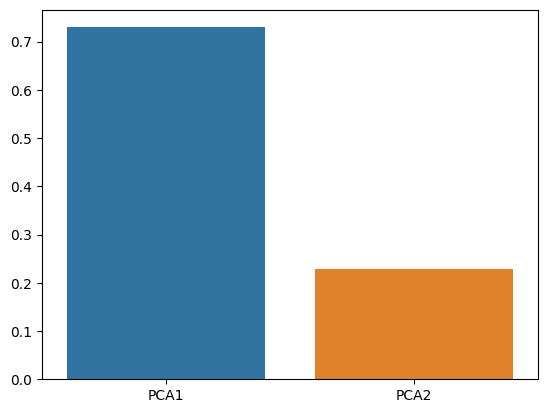

In [24]:
sns.barplot(x=['PCA1', 'PCA2'], y = pca2.explained_variance_ratio_)

<Axes: xlabel='PCA1', ylabel='PCA2'>

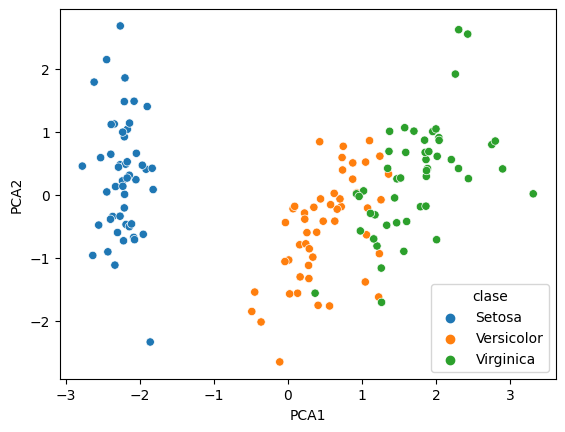

In [25]:
sns.scatterplot( x='PCA1', y='PCA2', hue='clase', data=df_2)

In [26]:
pca3 = PCA(n_components=3, random_state=42)

In [27]:
pca_3 = pca3.fit_transform(df[X_cols])

In [28]:
pca_3[:4]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011]])

In [30]:
df_3 = pd.DataFrame({'PCA1': pca_3[:,0], 'PCA2': pca_3[:,1], 'PCA3': pca_3[:,2],'clase': df['clase']})

In [31]:
df_3.head()

,PCA1,PCA2,PCA3,clase
0,-2.264703,0.480027,-0.127706,Setosa
1,-2.080961,-0.674134,-0.234609,Setosa
2,-2.364229,-0.341908,0.044201,Setosa
3,-2.299384,-0.597395,0.091290,Setosa
4,-2.389842,0.646835,0.015738,Setosa


In [32]:
pca3.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [33]:
pca3.explained_variance_ratio_.sum()

0.9948212908928451

<Axes: >

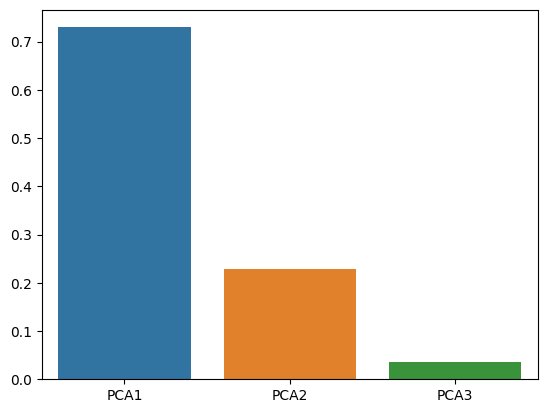

In [34]:
sns.barplot(x=['PCA1', 'PCA2', 'PCA3'], y = pca3.explained_variance_ratio_)

In [40]:
%matplotlib notebook

ModuleNotFoundError: No module named 'ipympl'

StopIteration: 

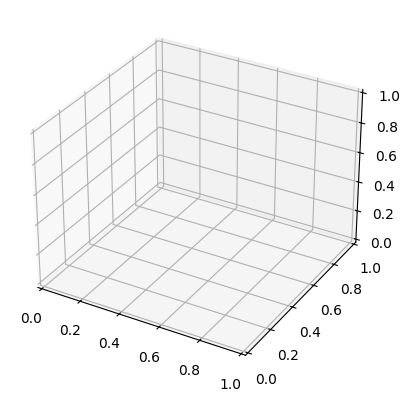

In [41]:
fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

x = df_3['PCA1']
y = df_3['PCA2']
z = df_3['PCA3']

col = df_3['clase'].map(
{'Iris-setosa':'r',
 'Iris-versicolor':'g',
 'Iris-virginica':'b'}  
)    

ax.scatter(x,y,z,  c=col,   marker='o')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()